In [76]:
import numpy as np
from numpy import sqrt, exp, pi, sum, sin, log, abs
from bilby.core.prior import Normal



SQRT_2_PI = sqrt(2 * pi)


def z(x):
    n = len(x)
    xbar = np.mean(x)
    part1 = 1 / (sqrt(n + 1))
    part2 = (1 / SQRT_2_PI) ** n
    exp_part = -0.5 * sum(x ** 2 + 0.5 * ((n * xbar) ** 2) / (n + 1))
    part3 = exp(exp_part)
    return part1 * part2 * part3

def lnz(x):
    n = len(x)
    xbar = np.mean(x)
    part1 = -0.5 * log(n + 1) 
    part2 = -n * log(SQRT_2_PI)
    exp_part = -0.5 * sum(x ** 2 + 0.5 * ((n * xbar) ** 2) / (n + 1))
    return part1 + part2 + exp_part

def likelihood(x, θ):
    n = len(x)
    part1 = (1 / SQRT_2_PI) ** n
    exp_part = -0.5 * sum((x - θ) ** 2)
    part2 = exp(exp_part)
    return part1 * part2

def lnl(x, θ):
    n = len(x)
    part1 = -n * log(SQRT_2_PI)
    exp_part = -0.5 * sum((x - θ) ** 2)
    return part1 + exp_part

def get_posterior_pdf(x):
    n = len(x)
    xbar = np.mean(x)
    mean = (n * xbar) / (n + 1)
    var = 1 / (n + 1)
    std = sqrt(var)
    return Normal(mu=mean, sigma=std)


def posterior(x, θ):
    return get_posterior_pdf(x).prob(θ)

def lnposterior(x, θ):
    return get_posterior_pdf(x).ln_prob(θ)

def lnprior(θ):
    return Normal(mu=0, sigma=1).ln_prob(θ)

def sample_posterior(x, size=int(10 ** 6)):
    return get_posterior_pdf(x).sample(size=size)

def fi_post(R, θ, θstar):
    M = len(θ)
    θstar_θ = θstar - θ
    return sum(sin(R * θstar_θ) / θstar_θ) / (M * pi)

def ln_fi_z(x, R, θ):
    θstar = np.mean(x)
    post = fi_post(R, θ, θstar)
    return lnl(x, θstar) +  lnprior(θstar) - log(post)


ROTIROTI_LNZ = -65.9905
n_expts = 500

R = 20
n = 50
M = 10 ** 6

lnfizs = np.zeros(n_expts)
lnzs = np.zeros(n_expts)
for i in range(n_expts):
    np.random.seed(i)
    x = Normal(mu=0, sigma=1).sample(n)
    θ = sample_posterior(x, size=M)
    lnfizs[i] = (ln_fi_z(x, R, θ))
    lnzs[i] = (lnz(x))
    


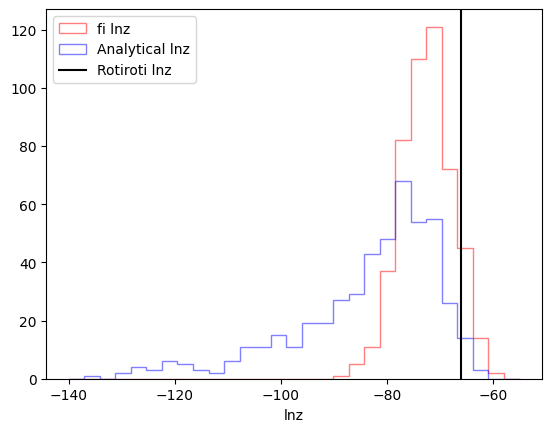

In [80]:
import matplotlib.pyplot as plt
bins = np.linspace(-140, -55, 30)
plt.hist(lnfizs, bins=bins, alpha=0.5, label="fi lnz", color="r", histtype="step")
plt.hist(lnzs, bins=bins, alpha=0.5, label="Analytical lnz", color="b", histtype="step")
plt.axvline(ROTIROTI_LNZ, color="k", label="Rotiroti lnz")
plt.xlabel("lnz")
_= plt.legend()